In [1]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
import ipywidgets as widgets
import numpy as np
from scipy.interpolate import griddata

rcParams['figure.figsize'] = 8,7
plt.close("all")

In [2]:
def calc_trajectory(xx, theta, v, g, x0):
    
   
    t = np.zeros((len(xx)))
    
    for kk in range(len(xx)):
        t[kk] =math.tan(theta)*(xx[kk]- x0) - (g*(xx[kk]-x0)**2)/(2*v*v*math.cos(theta)*math.cos(theta))

    return(t)

In [3]:
x0 =2
xx = np.linspace(0, 10, num=100)
v = 10
g = 9.81
theta = 45*math.pi/180
y = calc_trajectory(xx, theta, v, g, x0)


<IPython.core.display.Javascript object>


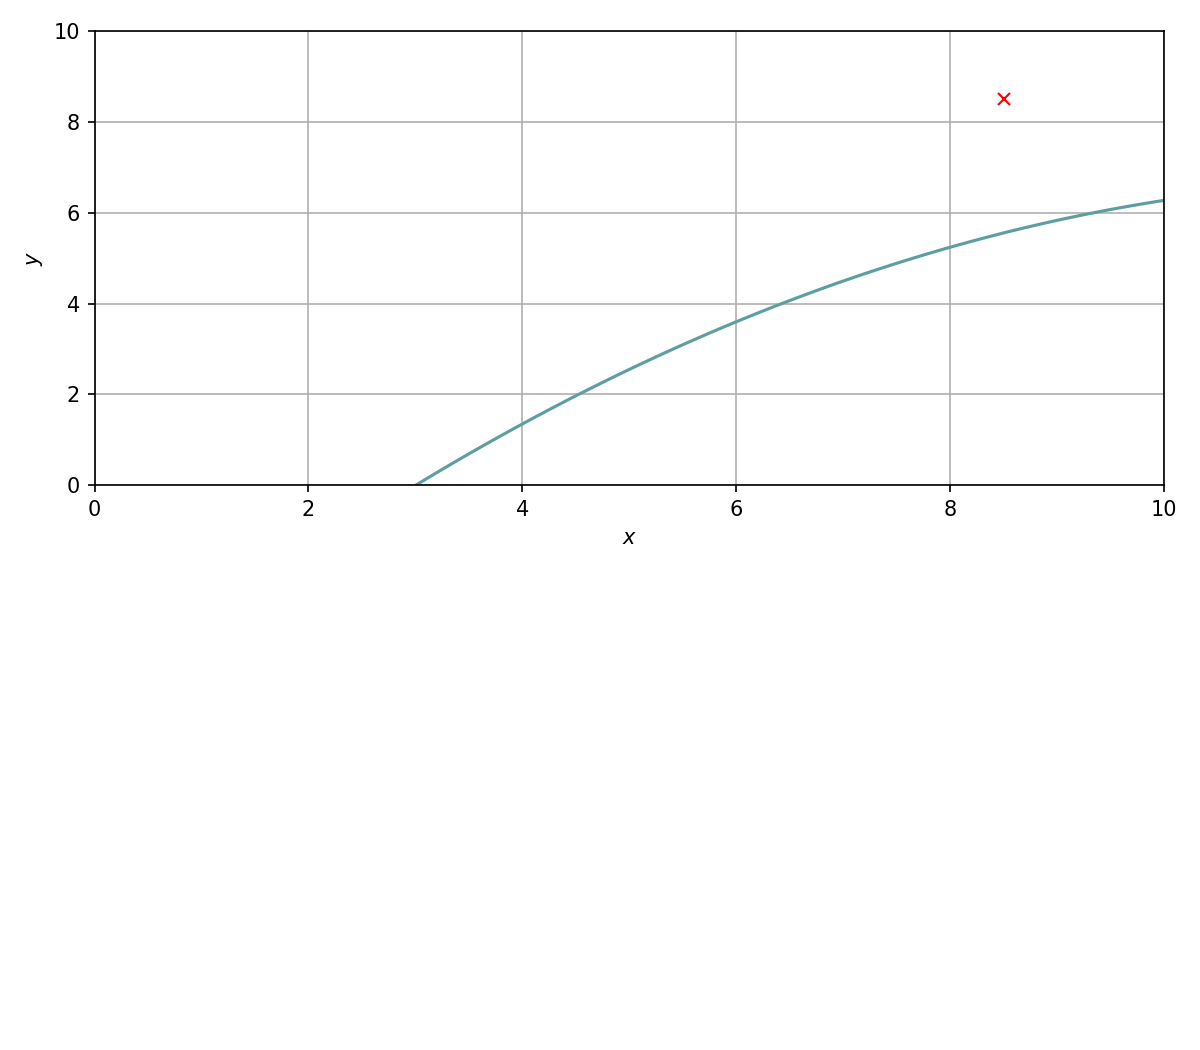

In [5]:

######################### Plot initial Figure ##################################################
fig = plt.figure(1)

#plot ASD
ax1 = plt.subplot2grid((4, 6), (0, 0), rowspan=2, colspan=6)
Traj = ax1.plot(xx,y,color = 'cadetblue')
ax1.plot(8.5,8.5,'rx')
#ASD2 = ax1.loglog(F,ASD,color = 'black')
plt.grid(which='minor')
plt.grid(which='major')
#plt.title(r'INPUT ASD')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
ax1.set_ylim([0,10])
ax1.set_xlim([0,10])

plt.tight_layout()


def f1(theta, v, x0):
    
    y = calc_trajectory(xx, theta*math.pi/180, v, g, x0)
    
    Traj[0].set_ydata([y])

    plt.show()    
w1 = widgets.interact(f1, theta =(0, 85, 1), v =(0, 20, 0.5), x0 =(0, 5, 0.25))


In [ ]:
def formatrndtable(filename,x,y):
    """
    parameters: 
        filename: name and location of txt file to print output to
        x: frequency values
        y: response values
    output: prints and saves text file to filename with tablernd formatted
    """
    file = open(filename,'w')
    ###print the first line
    firstline = "TABRND1        4     LOG     LOG                                        +       \n"
    file.write(firstline)
    #calculating number of lines in table body (not including first line)
    num_lines = math.ceil(len(x)/4)
    ###print all but last line
    for i in range(0,num_lines - 1) : 
        #start index in data vals
        istart = 4*i
        #format line
        line = "+       {:8.5}{:8.5}{:8.5}{:8.5}{:8.5}{:8.5}{:8.5}{:8.5}+\n".format(x[istart], y[istart],
                                                                  x[istart+1],y[istart+1],
                                                                  x[istart+2],y[istart+2],
                                                                  x[istart+3],y[istart+3])
        file.write(line)
    ###print the last line
    #begin formatting
    line = "+       "
    #print remaining values (will be <= 8)
    for i in range(0, len(x) - 4*(num_lines-1)):
        #format each value
        line += "{:8.5}{:8.5}".format(x[4*(num_lines-1) + i],y[4*(num_lines-1) + i])
    #format end
    line += "%8s\n" % "ENDT"
    #print line
    file.write(line)
    file.close()
    return

In [ ]:
filename = 'C:/Users/avduran/Desktop/CGI/DM/final desgin/NEW_LOADS/Force_limit/hi.txt'


formatrndtable(filename,F,ASDn)

In [ ]:
############# Initial Calculations ####################

